# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
import os
import joblib


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('C:/sistemMachienlearning/placementdata_raw.csv')

df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.shape

(10000, 12)

In [5]:
print("ExtracurricularActivities : ", df['ExtracurricularActivities'].unique())
print("PlacementTraining : ", df['PlacementTraining'].unique())
print("PlacementStatus : ", df['PlacementStatus'].unique())


ExtracurricularActivities :  ['No' 'Yes']
PlacementTraining :  ['No' 'Yes']
PlacementStatus :  ['NotPlaced' 'Placed']


In [6]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
df.drop(columns=['StudentID'], inplace=True)

In [9]:
df.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [10]:
print("ExtracurricularActivities : ", df['ExtracurricularActivities'].unique())
print("PlacementTraining : ", df['PlacementTraining'].unique())
print("PlacementStatus : ", df['PlacementStatus'].unique())

ExtracurricularActivities :  ['No' 'Yes']
PlacementTraining :  ['No' 'Yes']
PlacementStatus :  ['NotPlaced' 'Placed']


In [11]:
replacements = {
    'ExtracurricularActivities': {'No': 0, 'Yes': 1},
    'PlacementTraining': {'No': 0, 'Yes': 1},
    'PlacementStatus': {'NotPlaced': 0, 'Placed': 1},
}

df.replace(replacements, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11560\900300570.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(replacements, inplace=True)


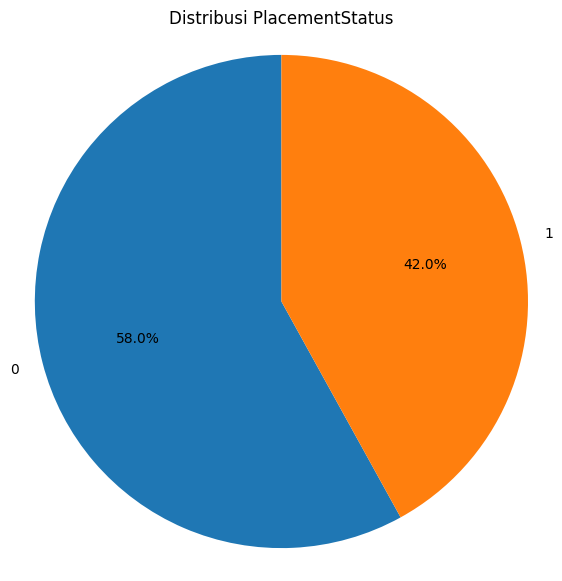

In [12]:
counts_placementStatus = df['PlacementStatus'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    counts_placementStatus,
    labels=counts_placementStatus.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Distribusi PlacementStatus")
plt.axis('equal')
plt.show()

In [13]:
counts_placementStatus

PlacementStatus
0    5803
1    4197
Name: count, dtype: int64

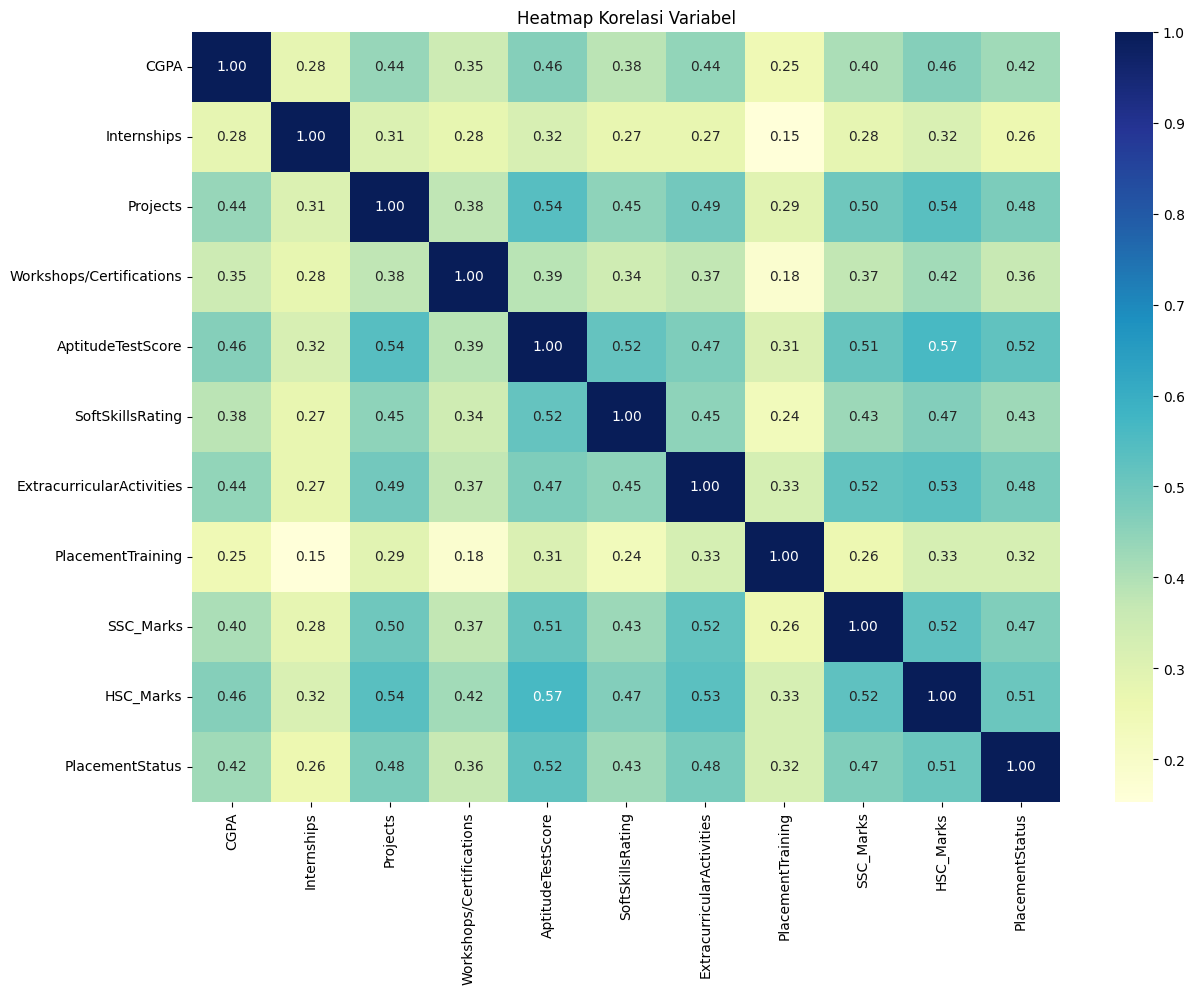

In [14]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")

plt.title("Heatmap Korelasi Variabel")
plt.show()

In [15]:
X = df.drop(columns='PlacementStatus')
y = df['PlacementStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
save_path = r"C:\sistemMachienlearning\preprocessing"

In [18]:
joblib.dump(scaler, os.path.join(save_path, "scaler.pkl"))

['C:\\sistemMachienlearning\\preprocessing\\scaler.pkl']

In [19]:
smote_tomek = SMOTETomek(random_state=32)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train_scaled, y_train)


In [20]:
print("Sebelum SMOTE:", y_train.value_counts())
print("Setelah SMOTE:", y_train_smote.value_counts())

Sebelum SMOTE: PlacementStatus
0    4631
1    3369
Name: count, dtype: int64
Setelah SMOTE: PlacementStatus
1    4254
0    4254
Name: count, dtype: int64


In [21]:
processed_df = pd.DataFrame(X_train_smote, columns=X.columns)
processed_df['PlacementStatus'] = y_train_smote

In [22]:
output_file = os.path.join(save_path, "processed_dataset_file_ipynb.csv")
processed_df.to_csv(output_file, index=False)

print("File berhasil disimpan di:", output_file)

File berhasil disimpan di: C:\sistemMachienlearning\preprocessing\processed_dataset_file_ipynb.csv
